## Post-merger late-time tail analysis example

- This example is based on the paper "Phenomenology and origin of late-time tails in eccentric binary black hole mergers" by Islam, Faggioli, Khanna, Field, van de Meent and Buonanno.
- Here, we inspect waveforms produced by merging eccentric binary black holes (BBH) in . These waveforms are all generated using black hole perturbation theory.
- The trajectories are described by the dynamics of the point-particle orbiting the Kerr black hole using effective-one-body formalism: http://arxiv.org/abs/gr-qc/9811091, http://arxiv.org/abs/gr-qc/0001013, http://arxiv.org/abs/2405.19006. These trajectories are then fed into the time-domain Teukolsky solver developed by Gaurav Khanna and collaborators: http://arxiv.org/abs/gr-qc/0703028, http://arxiv.org/abs/0803.0317, http://arxiv.org/abs/0803.0317, http://arxiv.org/abs/1003.0485, http://arxiv.org/abs/1108.1816, http://arxiv.org/abs/arXiv:2010.04760.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
matplotlib.rcParams['mathtext.fontset'] ='stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral' 
matplotlib.rcParams['axes.linewidth'] = 1 #set the value globally
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['font.size'] = '18'
plt.rc('text', usetex=True)

## 1. Import gwtails

In [2]:
import sys
# provide a path for the gwtails package
PATH_TO_GWTAILS = "/data/tislam/works/tails/pool/gwtails/"
sys.path.append(PATH_TO_GWTAILS)
import gwtails
from gwtails import PostMergerAmplitudeFit

In [3]:
help(PostMergerAmplitudeFit)

Help on class PostMergerAmplitudeFit in module gwtails.tails:

class PostMergerAmplitudeFit(builtins.object)
 |  PostMergerAmplitudeFit(filename, qinput=1000, throw_junk_until_indx=None, qnm_fit_window=None, tail_fit_window=None, crossterm_fit_window=None, fit_tail_envelop=False)
 |  
 |  Class to fit post-merger data
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename, qinput=1000, throw_junk_until_indx=None, qnm_fit_window=None, tail_fit_window=None, crossterm_fit_window=None, fit_tail_envelop=False)
 |      filename: name of the waveform data file (Required) 
 |      qinput: mass ratio values with qinput>=1
 |      throw_junk_until_indx: last index until which data should be discarded before applying qnm or tail fits; 
 |                             Default is None
 |                             
 |      tail_fit_window: provide a window for fitting tail coefficients only;
 |                       e.g. [200,800] (in M);
 |                       Default is None (in that c

## 2. Analyze post-merger waveforms

In [4]:
# import data file
# this is for a merging binary with 
# mass ratio q=1000, eccentricity e=0.9 and spin a=0.0
file = 'hm02_ecc_p09_e09_a00_q_1000.dat'

In [5]:
# pass it too gwtails without doing anything
# we will check the raw data first
rd = PostMergerAmplitudeFit(filename=file)

Data read. Shape of data : (11,11500)


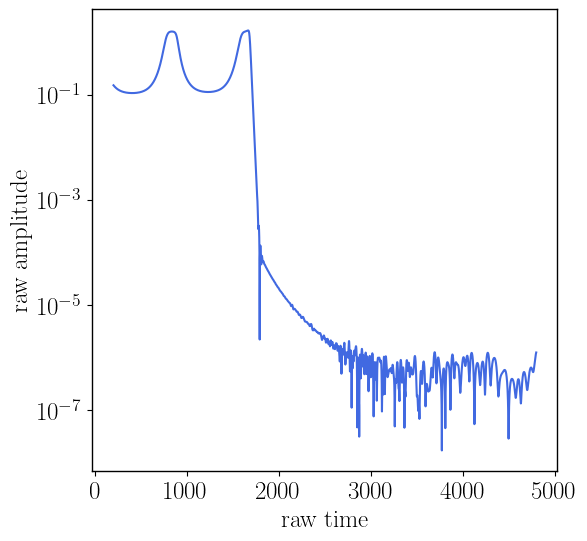

In [6]:
rd.plot_raw_amplitude()

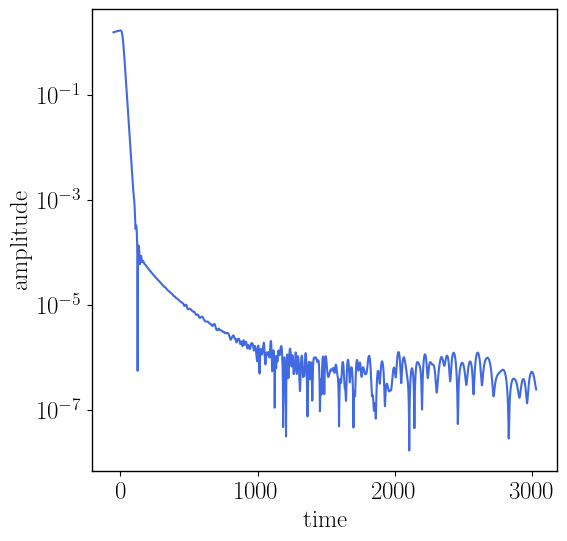

In [7]:
# plot the waveform amplitude after making sure that the peak at t=0
# and interpolating on a new time grid
rd.plot_interpolated_amplitude()

Data read. Shape of data : (11,11500)


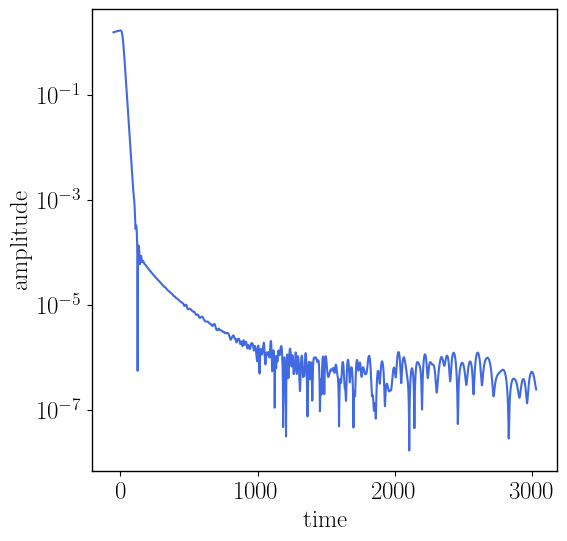

In [8]:
# make sure to throw the initial orbits for the post-merger fits
rd = PostMergerAmplitudeFit(filename=file,
                                throw_junk_until_indx=1200)
# and we are done
rd.plot_interpolated_amplitude()

In [9]:
# now pass it again to gwtails with fit options
rd = PostMergerAmplitudeFit(filename=file, 
                            throw_junk_until_indx=1100, # initial indices to remove before analyzing post-merger data
                            qnm_fit_window=[20,70], # time window to fit qnm
                            tail_fit_window=[200,1000],  # time window to fit tails
                            crossterm_fit_window=[30,400]) # time window to fit the crossterms

Data read. Shape of data : (11,11500)


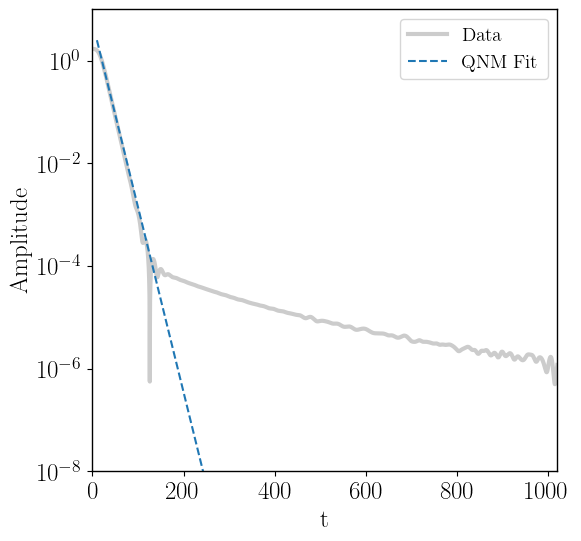

In [10]:
rd._plot_qnm_fit()

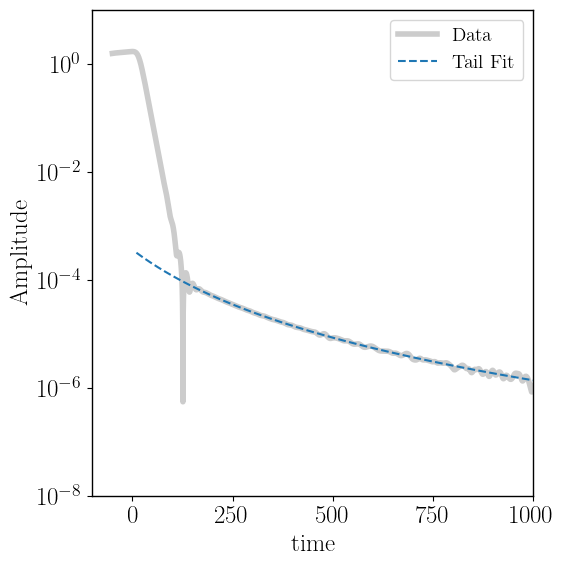

In [11]:
rd._plot_tail_fits()

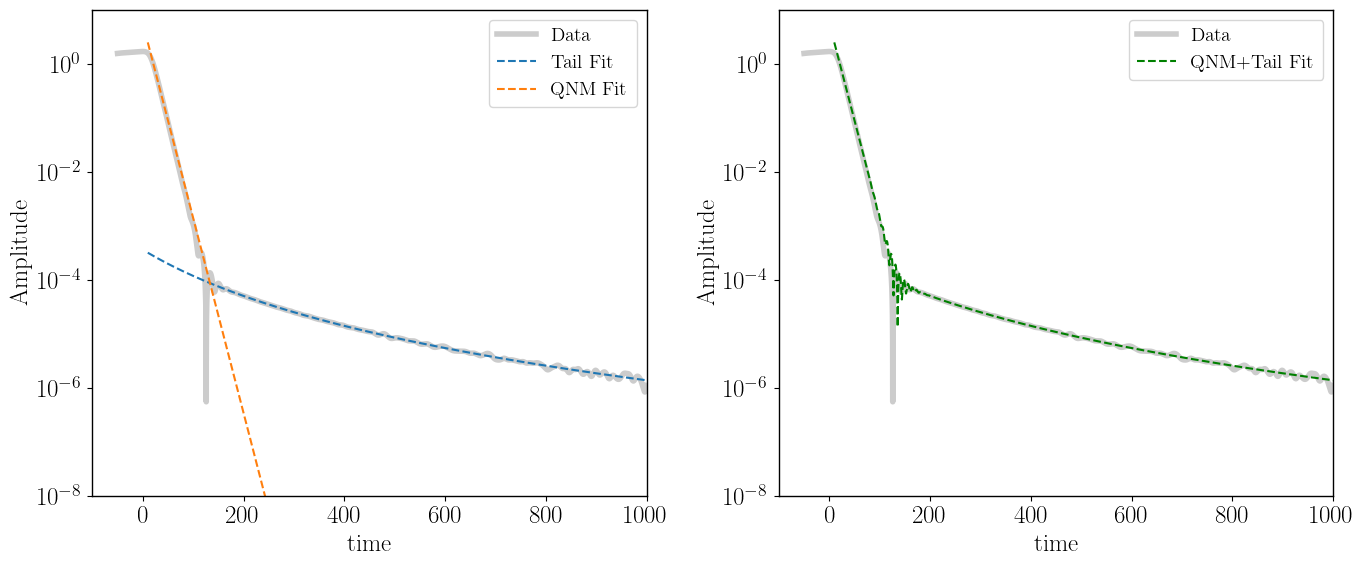

In [12]:
rd._plot_all_fits()

In [13]:
# print interesting fit params
rd._print_all_fits()

Atail : 3.616772118e+05
c : 2.816224627e+02
n : 3.671228685e+00
Aqnm : 5.773862021
tau : 12.037748086
